# WORK IN PROGRESS

This notebook shows some data I'm trying to collect on public home sales data in Los Angeles.  There's some challenges to this task, and I'm sharing this for discussion purposes.  This work needs a database of parcel IDs, instead of the random guess and check ranges approach I tried here.  This work also needs a way of extending this data.  I'm not sure I trust the SalePrice data, but we can audit that.  Even still, there are not features about the homes in this dataset.

More info on the project here: http://dataskeptic.com/home-sales/

In [4]:
!sudo pip install geopy
!sudo pip install geocoder
!sudo apt-get install s3cmd

You are using pip version 7.1.2, however version 8.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |################################| 155kB 4.2MB/s 
You are using pip version 7.1.2, however version 8.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  s3cmd
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 67.6 kB of archives.
After this operation, 295 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu/ trusty/universe s3cmd all 1.1.0~beta3-2 [67.6 kB]
Fetched 67.6 kB in 1s (56.6 kB/s)
Selecting previously unselected package s3cmd.
(Reading database ... 128375 files and directories currently installed.)
Preparing to unpack .../s3cmd_1.1.0~beta3-2_all.deb ...
Unpacking s3cmd (1.1.0~beta3-2) ...
Pr

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
import numpy as np
import pandas as pd # odd dependency, must import before basemap!
import matplotlib.pyplot as plt
import requests
import pickle
import os
import time
import glob
import json
import geocoder

In [ ]:
http://maps.assessor.lacounty.gov/Geocortex/Essentials/REST/sites/PAIS/SQLAINSearch?f=json&AIN=4318013006&dojo.preventCache=1430795897957


In [1]:
url = "http://maps.assessor.lacounty.gov/arcgis/rest/services/Assessor/pais_parcels/MapServer/0/query?f=json" + \
"&where=" + \
"&returnGeometry=true" + \
"&spatialRel=esriSpatialRelIntersects" + \
"&geometry=%7B%22x%22%3A-13182120.084026571%2C%22y%22%3A4034463.322026376%2C%22spatialReference%22%3A%7B%22wkid%22%3A102100%7D%7D" + \
"&geometryType=esriGeometryPoint" + \
"&inSR=102100" + \
"&outFields=*" + \
"&outSR=102100"
url

'http://maps.assessor.lacounty.gov/arcgis/rest/services/Assessor/pais_parcels/MapServer/0/query?f=json&where=&returnGeometry=true&spatialRel=esriSpatialRelIntersects&geometry=%7B%22x%22%3A-13182120.084026571%2C%22y%22%3A4034463.322026376%2C%22spatialReference%22%3A%7B%22wkid%22%3A102100%7D%7D&geometryType=esriGeometryPoint&inSR=102100&outFields=*&outSR=102100'

In [6]:
ddir = 'data/'

In [ ]:
#4249-022-026
#4249022026
ain = 4249001001
ain = 4246010000
ain = 4235000000
iter = 100000
sc = 200
ains = []
while iter > 0 and sc == 200:
    file = 'ain_' + str(ain) + 'pkl'
    if not(os.path.isfile(ddir + file)):
        #print 'Getting ' + str(ain)
        r = requests.get('http://maps.assessor.lacounty.gov/Geocortex/Essentials/REST/sites/PAIS/SQLAINSearch?f=json&AIN=' + str(ain) + '&dojo.preventCache=1430795897957')
        f = open(file, 'wb')
        pickle.dump(r, f)
        f.close()
        time.sleep(.5)
        sc = r.status_code
        ain += 1
    else:
        r = pickle.load(open(ddir + file, 'r'))
        ain += 1
    data = json.loads(r.text)
    if not(data['results']['ParcelDetails']):
        pnfd = data['results']['ParcelNotFoundDetails']
        if not(pnfd):
            print 'Skipping at ' + str(ain)
            ain += 1000
        else:
            ain = int(pnfd['NextAIN'])
    else:
        ains.append(ain)
    iter -= 1

if sc != 200:
    print 'halted'

Skipping at 4235004041
Skipping at 4236004011

In [6]:
x = pickle.load(open('data/x00/ain_4295001900.pkl', 'r'))
x.text

u'{"results":{"ParcelDetails":{"ParcelType":0,"Improvements":[],"Legals":["SILVER STRAND FOR DESC SEE ASSESSOR\\u0027S","MAPS POR OF LOT R"," "," "," "," "],"AIN":"4295001900","FormattedAIN":"4295-001-900","Address1":"","Address2":"","UseType":"VAC","UseType_Label":"Vacant Land","REGION":"07","REGION_LABEL":"West District","CLUSTER":"07127","TRA":"00067","RECDATE":"03/05/1996","SalePrice":"","SaleDate":"","LANDVAL":"$0","IMPROVAL":"$0","PPVALUE":"$0","FIXTVAL":"$0","HOEVAL":"$0","REEXEVAL":"$0","PPEXEVAL":"$0","FIXEVEV":"$0","Assr_Map":null,"Assr_Index_Map":null,"IsParcelsDisplay":true},"ParcelChanges":null,"ParcelNotFoundDetails":null}}'

In [4]:
geolocator = Nominatim()
addresses = {}

In [19]:
print file

data/x00


In [21]:
files = os.listdir(ddir + d)
files

['ain_4235000000.pkl',
 'ain_4235021900.pkl',
 'ain_4235024900.pkl',
 'ain_4236011900.pkl',
 'ain_4236021900.pkl',
 'ain_4237021900.pkl',
 'ain_4238002900.pkl',
 'ain_4238010900.pkl',
 'ain_4238014900.pkl',
 'ain_4238018900.pkl',
 'ain_4238020900.pkl',
 'ain_4238024900.pkl',
 'ain_4239014900.pkl',
 'ain_4239018900.pkl',
 'ain_4239019900.pkl',
 'ain_4239024900.pkl',
 'ain_4239027900.pkl',
 'ain_4239029900.pkl',
 'ain_4240015900.pkl',
 'ain_4240018900.pkl',
 'ain_4241005900.pkl',
 'ain_4241028900.pkl',
 'ain_4242019900.pkl',
 'ain_4243021900.pkl',
 'ain_4243023900.pkl',
 'ain_4243024900.pkl',
 'ain_4244001900.pkl',
 'ain_4244003900.pkl',
 'ain_4244021900.pkl',
 'ain_4245015900.pkl',
 'ain_4245018900.pkl',
 'ain_4246005900.pkl',
 'ain_4246008900.pkl',
 'ain_4246010000.pkl',
 'ain_4247001900.pkl',
 'ain_4247010000.pkl',
 'ain_4247019900.pkl',
 'ain_4247021900.pkl',
 'ain_4247029900.pkl',
 'ain_4247031900.pkl',
 'ain_4248003900.pkl',
 'ain_4248015900.pkl',
 'ain_4249001900.pkl',
 'ain_42490

In [23]:
dirs = os.listdir(ddir)
ains = []
for d in dirs:
    files = os.listdir(ddir + d)
    for file in files:
        i = file.index('ain_')
        ain = int(file[(i+4):(len(file)-4)])
        ains.append(ain)

In [34]:
addresses = {}
for ain in ains:
    sain = str(ain)
    pdir = 'x' + sain[-2:] + '/'
    file = ddir + pdir + 'ain_' + sain + '.pkl'
    if os.path.isfile(file):
        data = json.loads(pickle.load(open(file, 'r')).text)
        details = data['results']['ParcelDetails']
        if details:
            if int(details['AIN']) % 1000 == 1:
                addr = details['Address1'] + ' ' + details['Address2']
                try:
                    loc = addresses[ain]
                except KeyError:
                    print 'Getting ' + addr
                    loc = geocoder.google(addr)
                    addresses[ain] = loc
    else:
        print 'nope', file

pickle.dump(addresses, open('addresses.pkl', 'wb'))

Getting 12602 MATTESON AVE LOS ANGELES CA 90066
Getting 3945 FRANCES AVE LOS ANGELES CA 90066
Getting 12604 MITCHELL AVE LOS ANGELES CA 90066
Getting 12503 WASHINGTON PL LOS ANGELES CA 90066
Getting 12501 MITCHELL AVE LOS ANGELES CA 90066
Getting 12507 CASWELL AVE LOS ANGELES CA 90066
Getting 12548 MATTESON AVE LOS ANGELES CA 90066
Getting 12506 PACIFIC AVE LOS ANGELES CA 90066
Getting 12504 VENICE BLVD LOS ANGELES CA 90066
Getting 12400 PACIFIC AVE LOS ANGELES CA 90066
Getting 3903 S CENTINELA AVE LOS ANGELES CA 90066
Getting 3921 S CENTINELA AVE LOS ANGELES CA 90066
Getting 12400 CASWELL AVE LOS ANGELES CA 90066
Getting 12400 MITCHELL AVE LOS ANGELES CA 90066
Getting 12303 WASHINGTON PL CULVER CITY CA 90066
Getting 3839 GRAND VIEW BLVD LOS ANGELES CA 90066
Getting 3807 GRAND VIEW BLVD LOS ANGELES CA 90066
Getting 3923 KEESHEN DR LOS ANGELES CA 90066
Getting 3923 INGLEWOOD BLVD LOS ANGELES CA 90066
Getting 2426 LINCOLN BLVD LOS ANGELES CA 90291
Getting 2498 LINCOLN BLVD LOS ANGELES CA

TypeError: can't pickle instancemethod objects

In [18]:
[len(ains), len(addresses)]

[100696, 1746]

In [24]:
x = addresses[addresses.keys()[0]]
x.latlng

{'lat': 34.048537, 'lng': -118.446264}

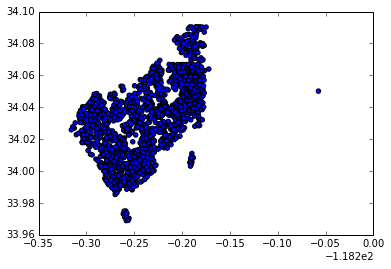

In [25]:
lats = []
lons = []
for key in addresses.keys():
    addr = addresses[key]
    if addr:
        lat = addr.lat
        lon = addr.lng
        lats.append(lat)
        lons.append(lon)

plt.scatter(lons, lats)

In [165]:
#4249-022-026
key

4318024002